### Boston data

Variables in order:
-  CRIM     per capita crime rate by town
-  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
-  INDUS    proportion of non-retail business acres per town
-  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
-  NOX      nitric oxides concentration (parts per 10 million)
-  RM       average number of rooms per dwelling
-  AGE      proportion of owner-occupied units built prior to 1940
-  DIS      weighted distances to five Boston employment centres
-  RAD      index of accessibility to radial highways
-  TAX      full-value property-tax rate per \$10,000
-  PTRATIO  pupil-teacher ratio by town
-  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
-  LSTAT    % lower status of the population
-  MEDV     Median value of owner-occupied homes in $1000's

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston

import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
boston = load_boston()

In [28]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
type(boston.data)

boston.data.shape

numpy.ndarray

(506, 13)

In [21]:
boston_df = pd.DataFrame(data=boston.data)

boston_df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']

type(boston_df)
boston_df.shape
boston_df.dtypes
boston_df.head()
boston_df.tail()

pandas.core.frame.DataFrame

(506, 13)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [17]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [24]:
# Boston dependent variable

boston.target.shape

print(boston.target)

(506,)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [43]:
# Boston dependent variable as pandas df

boston_target_df = pd.DataFrame(boston.target)

boston_target_df.columns = ['MEDV']

boston_target_df.shape
boston_target_df.head()

(506, 1)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Single X variable model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept:  34.55384087938311
Coefficients:  [-0.95004935]

Mean squared error: 38.48
Variance score: 0.54


Text(0.5,1,'Input vs. Dependent variable Fitted Line')

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

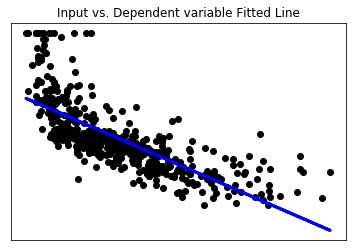

In [68]:
# Fit simple linear model: equivalent of lm.fit=lm(medv∼lstat) in R

x = boston_df.loc[:, ['LSTAT']]
y = boston_target_df['MEDV']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

# Make predictions using the testing set
y_pred = regr.predict(x)

# Print the coefficients
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)
print()
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('Input vs. Dependent variable Fitted Line')

plt.xticks(())
plt.yticks(())

plt.show()

In [63]:
residuals = y - y_pred

y[0:10], y_pred[0:10], residuals[0:10]

(0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 5    28.7
 6    22.9
 7    27.1
 8    16.5
 9    18.9
 Name: MEDV, dtype: float64,
 array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
        29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693]),
 0    -5.822595
 1    -4.270390
 2     3.974858
 3     1.639304
 4     6.709922
 5    -0.904084
 6     0.155273
 7    10.739604
 8    10.381136
 9     0.592003
 Name: MEDV, dtype: float64)

Text(0.5,1,'Residuals vs. Fitted')

Text(0.5,1,'Distribution of Residuals')

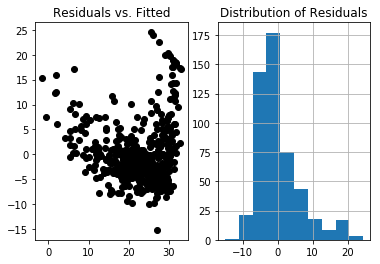

In [65]:
# Residual plots

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals,  color='black')
plt.title('Residuals vs. Fitted')

plt.subplot(1, 2, 2)
residuals.hist()
plt.title('Distribution of Residuals')

plt.show()

## Multiple Linear Regression

In [114]:
# Regression function with evaluation

def linear_regression_summary(x, y):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)

    # Make predictions using the testing set
    y_pred = regr.predict(x)

    # Print the coefficients
    print('Intercept: ', regr.intercept_)
    print('Coefficients: ', regr.coef_)
    print()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))

    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y, y_pred))

    # Plot fitted values
    cols = list(x)
    for col in cols:
        plt.scatter(x.loc[:,col], y,  color='black')
        plt.scatter(x.loc[:,col], y_pred, color='blue')
        plt.title('Input vs. Dependent variable Fitted Line')
        plt.xlabel(col)
        plt.ylabel('Y')
#         plt.xticks(())
#         plt.yticks(())
        plt.show()
    
    # Residual plots
    residuals = y - y_pred
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals,  color='black')
    plt.title('Residuals vs. Fitted')
    plt.xlabel('Fitted Value')
    plt.ylabel('Residual')
    plt.subplot(1, 2, 2)
    residuals.hist()
    plt.title('Distribution of Residuals')
    plt.xlabel('Residual')
    plt.show()

Intercept:  33.2227605317929
Coefficients:  [-1.03206856  0.03454434]

Mean squared error: 37.88
Variance score: 0.55


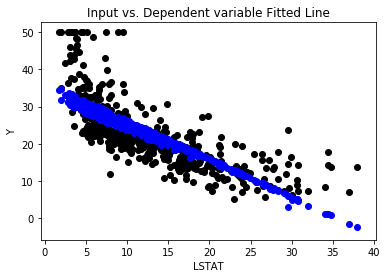

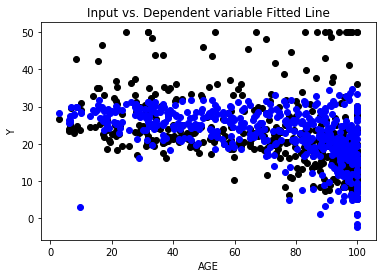

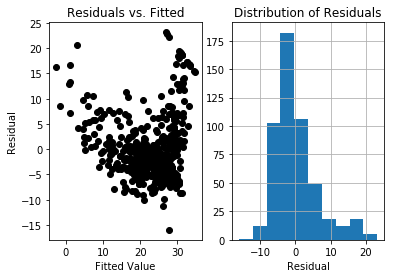

In [115]:
# Call function

linear_regression_summary(boston_df.loc[:, ['LSTAT', 'AGE']], boston_target_df['MEDV'])

Intercept:  36.49110328036137
Coefficients:  [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]

Mean squared error: 21.90
Variance score: 0.74


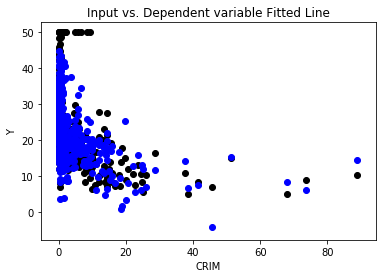

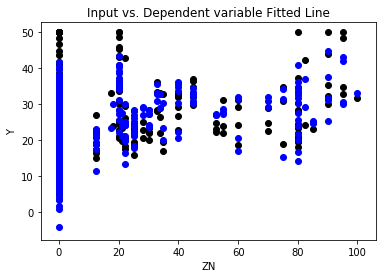

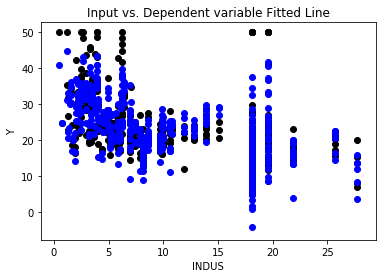

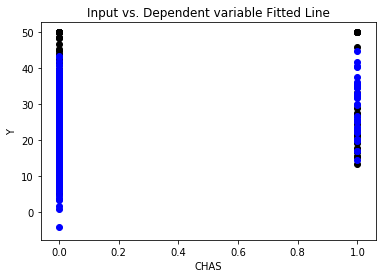

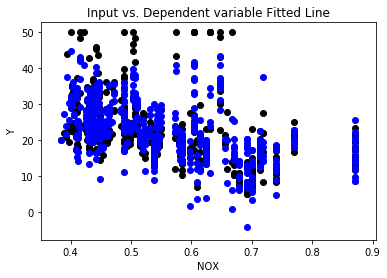

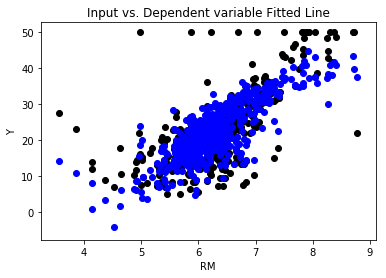

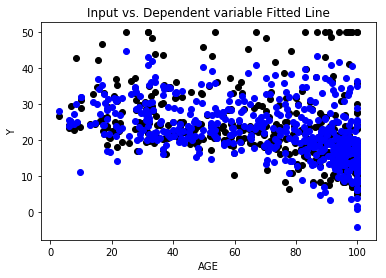

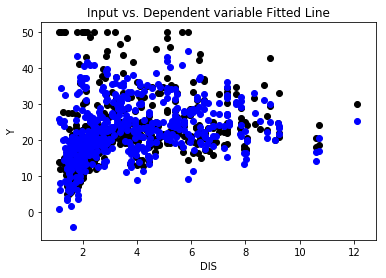

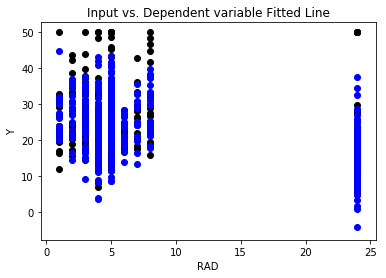

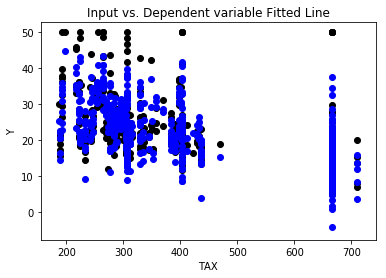

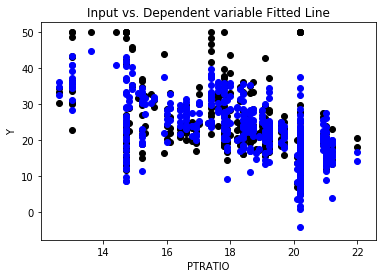

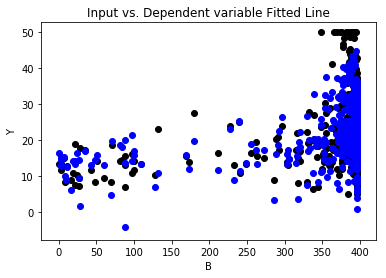

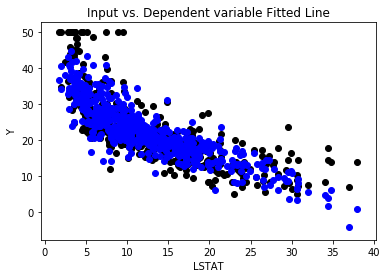

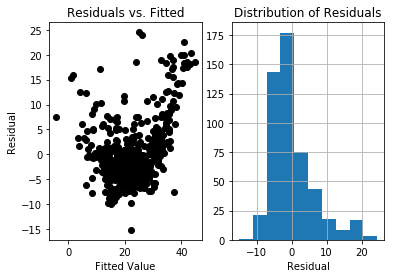

In [105]:
# Call function

linear_regression_summary(boston_df, boston_target_df['MEDV'])

### Statsmodel version

In [111]:
x = boston_df
y = boston_target_df['MEDV']

x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 13 May 2019   Prob (F-statistic):          6.95e-135
Time:                        11:24:02   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0